In [5]:
#@title
import numpy as np
import ipywidgets as widgets
import seaborn as sns

n = widgets.IntSlider(value=5000, min= 500, max=10000, step=500, description='n')
x_mu = widgets.FloatSlider(value=0, min= -3, max=3, description='x_mu')
y_mu = widgets.FloatSlider(value=0, min= -3, max=3,description='y_mu')
x_sd = widgets.FloatSlider(value=1, min=1, max=3, description='x_sd')
y_sd = widgets.FloatSlider(value=1, min=1, max=3, description='y_sd')
rho = widgets.FloatSlider(value=0, min=-1, max=1, description='rho')
sliders = [n, x_mu, y_mu, x_sd, y_sd, rho]
for idx, s in enumerate(sliders):
  display(sliders[idx])
plot_type = widgets.ToggleButtons(
    options=['scatter', 'kde'],
    description='Plot type:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Scatter plot', 'Kernel density estimation'],
     #icons=['check'] * 2
)
display(plot_type)
# initialize values for the app
sample = None
old_n_value = 0

IntSlider(value=5000, description='n', max=10000, min=500, step=500)

FloatSlider(value=0.0, description='x_mu', max=3.0, min=-3.0)

FloatSlider(value=0.0, description='y_mu', max=3.0, min=-3.0)

FloatSlider(value=1.0, description='x_sd', max=3.0, min=1.0)

FloatSlider(value=1.0, description='y_sd', max=3.0, min=1.0)

FloatSlider(value=0.0, description='rho', max=1.0, min=-1.0)

ToggleButtons(description='Plot type:', options=('scatter', 'kde'), tooltips=('Scatter plot', 'Kernel density …

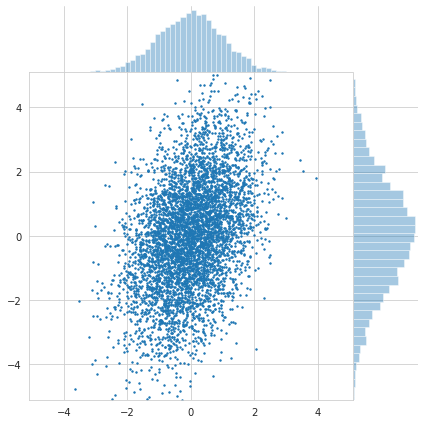

In [7]:
#@title
mu = np.array([x_mu.value, y_mu.value])
Sigma = np.array([[x_sd.value,0],[0,y_sd.value]])
R = np.array([[1,rho.value],[rho.value,1]])
Q = Sigma @ R @ Sigma
sample = np.random.multivariate_normal(mu, Q, n.value)
rng = [[x_mu.value+x_sd.value*np.array([-3,3])],
[y_mu.value+y_sd.value*np.array([-3,3])]]
rng_lower=np.min(rng,axis=0)[0,0]
rng_upper=np.max(rng,axis=0)[0,1]
sns.set_style("whitegrid")                                                              
out = sns.jointplot(sample[:,0],sample[:,1],kind=plot_type.value
  ,xlim=[rng_lower, rng_upper]
  ,ylim=[rng_lower, rng_upper]
  ,space=0
  ,s=2
)